In [2]:
# get backend -- Armonk
from qiskit import IBMQ

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')


ibmqfactory.load_account:WARNING:2020-06-07 09:32:53,670: Credentials are already in use. The existing account in the session will be replaced.


In [4]:
#Rabi Experiment Parameters

import numpy as np 

#?
qubit = 0 

#Number of samples
duration = 128
sigma = 16    #standard deviation of Gaussian
num_points = 64  # number of different amplitudes

drive_amps = np.linspace(0,0.1, num_points) #spacing out the amplitudes

#time for each pulse
backend.configuration().dt

2.2222222222222221e-10

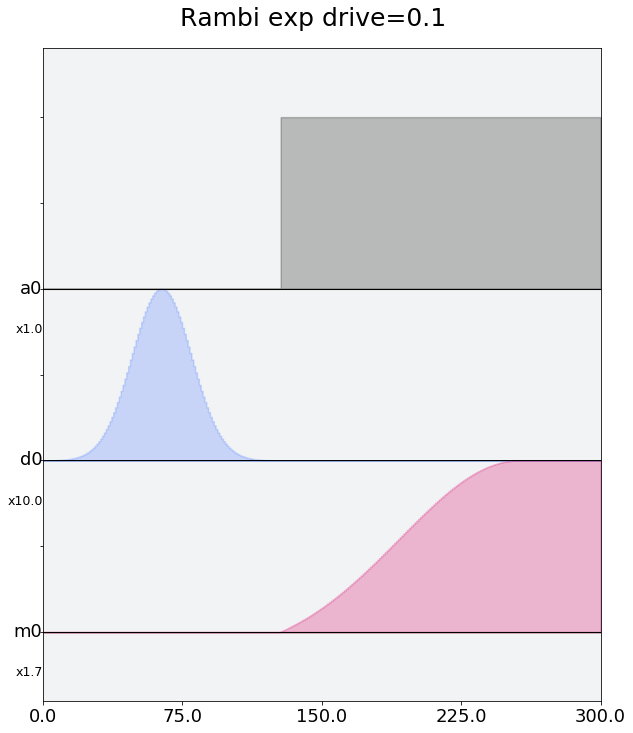

In [14]:
# setting up rabi experiment parameters
from qiskit import pulse
from qiskit.pulse import pulse_lib
from qiskit.scheduler import measure

rabi_schedules = [] # place to keep all 64 experiments
for amp in drive_amps: 
    # giving name to some experiment
    sched = pulse.Schedule(name = 'Rambi exp drive={}'.format(amp))
    # giving instructions regarding samples, channels
    sched += pulse.Play(pulse_lib.Gaussian(duration, amp, sigma), 
                       pulse.DriveChannel(qubit))
    #using the default measurement signal provided by backend
    sched += measure([qubit], backend) <<sched.duration
    #not playing measurement at t = 0
    
    #adding to rabi schedule list 
    rabi_schedules.append(sched)
    
rabi_schedules[-1].draw(plot_range=(0,300))


In [16]:
from qiskit import execute

job = execute(rabi_schedules, backend, shots= 2048, meas_level = 1)


IBMQBackendApiError: "Error submitting job: '403 Client Error: Forbidden for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs. The queue is disabled., Error code: 3245.'"